# Logistic Regression

More information at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


## Classification metrics

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The evaluation of performance are based on the Confusion Matrix
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply Area Under Curve (AUC)
- Matthew Correlation Coefficient

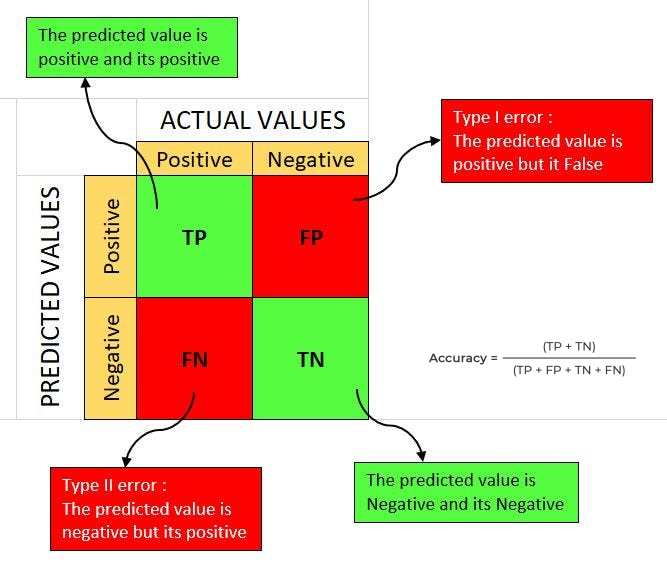

In [1]:
from IPython import display
display.Image("Image/ConfusionMatrix1.png")

### Micro/Macro Metrics

For multiclass classification we use Micro/Macro average.  A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

Nice tutorial at (https://iamirmasoud.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/)


## Simple logistic regression

Let's start generating a sample with three intersecting clusters

In [2]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import ConfusionMatrixDisplay

# we create two clusters of random points
n_samples = 1000
centers = 3
clusters_std = 4
X, y = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)

Plot the samples

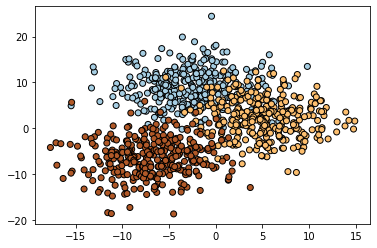

In [3]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

Split the data into train and test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit the model and get the separating hyperplane: use the LogisticRegression class

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

Make the predictions on the test input data

In [6]:
y_pred_test = clf.predict(X_test)

Classification report and confusion matrix

In [7]:
# Do not modify
from sklearn.metrics import classification_report

# Complete here
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.87      0.86      0.87        95
           2       0.96      0.99      0.97        97

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



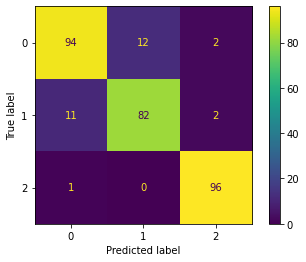

In [8]:
# Complete here
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

## Balanced/Unbalanced Dataset

Let's now create two clusters with very different sample sizes

In [9]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# we create two clusters of random points with very different sample sizes
n_samples_1 = 10000
n_samples_2 = 1000
centers = [[0.0, 0.0], [3.0, 3.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)

Plot the samples

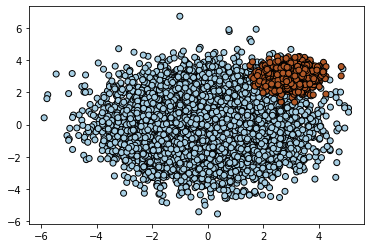

In [10]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

Split train and test data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit the model

In [12]:
# fit the model and get the separating hyperplane
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

Make predictions

In [13]:
# Predict X_test
y_pred_test = clf.predict(X_test)

Calculate the accuracy with `accuracy_score` and `matthews_corrcoef`: what do you notice?

In [14]:
# Do not modify
from sklearn.metrics import accuracy_score, matthews_corrcoef

# Calculate using Accuracy
print("Train Accuracy score: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Train Accuracy score:  0.9844155844155844
Test Accuracy score:  0.9839393939393939


In [15]:
# Calculate using MCC
print("Train Accuracy score: ", matthews_corrcoef(y_train, y_pred_train))
print("Test Accuracy score: ", matthews_corrcoef(y_test, y_pred_test))

Train Accuracy score:  0.9076268516084255
Test Accuracy score:  0.9041824893168773


Different startegy to deal with this problem
- Collecting more data
- Use the right evaluation metrics
- Under-sampling the majority class
- Over-sampling the minority class
- Cost in your Model definition

## Stratified Train/Test/Validation split

Stratified sampling is a sampling technique where the samples are selected in the same proportion (by dividing the population into groups called ‘strata’ based on a characteristic) as they appear in the population. Let's analyze a more complex dataset and make a stratified split.

In [16]:
# Do not modify
# import dataset aggregated dataset metadata
import json

with open('./Data/tutorial_metadata.json', 'r') as f:
    metadata = json.load(f)
    lines = f.readlines()

print(metadata.keys())

dict_keys(['pid', 'covariates', 'quality', 'total_hours', 'available_hours'])


In [17]:
# Do not modify
import pandas as pd
newdf = pd.DataFrame(metadata)
newdf.head()

,pid,covariates,quality,total_hours,available_hours
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42


The `covariates` column in this dataset contains a lot of useful information:

In [18]:
# Do not modify
newdf["covariates"][0]

{'age': 53,
 'female': 0,
 'male': 1,
 'other': 0,
 'rosc': nan,
 'ohca': True,
 'vfib': True,
 'ttm': 33,
 'outcome': 0,
 'cpc': 1.0}

Find a way to add each datum in the `covariates` column as a new column to the main dataframe.

In [19]:
df1 = pd.DataFrame(metadata)
df2 = pd.DataFrame(metadata['covariates'])
df =pd.concat([df1, df2], axis=1, join="inner")
df.head()

,pid,covariates,quality,total_hours,available_hours,age,female,male,other,rosc,ohca,vfib,ttm,outcome,cpc
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17,53.0,0,1,0,NaN,True,True,33.0,0,1.0
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17,85.0,1,0,0,7.0,True,True,NaN,0,1.0
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3,48.0,0,1,0,NaN,True,True,36.0,0,1.0
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23,45.0,0,1,0,NaN,True,True,33.0,0,1.0
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42,51.0,0,1,0,24.0,True,True,33.0,0,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              607 non-null    object 
 1   covariates       607 non-null    object 
 2   quality          607 non-null    object 
 3   total_hours      607 non-null    int64  
 4   available_hours  607 non-null    int64  
 5   age              606 non-null    float64
 6   female           607 non-null    int64  
 7   male             607 non-null    int64  
 8   other            607 non-null    int64  
 9   rosc             303 non-null    float64
 10  ohca             566 non-null    object 
 11  vfib             575 non-null    object 
 12  ttm              509 non-null    float64
 13  outcome          607 non-null    int64  
 14  cpc              607 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 71.3+ KB


Now let's focus on the `age`: delete the `NaN` values and create a new column `AgeGroup` to binarize the `age` datum into two classes: `'50-'` if 50 years or below, `'51+'` if 51 years or above. 

In [21]:
import numpy as np

# Delete NaN
df = df[df['age'].notna()]

# Binarize Age Data
df['AgeGroup'] = pd.cut(
    df["age"],
    bins=[-np.inf, 50, np.inf],
    labels=["50-", "51+"],
)
df.head()

,pid,covariates,quality,total_hours,available_hours,age,female,male,other,rosc,ohca,vfib,ttm,outcome,cpc,AgeGroup
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17,53.0,0,1,0,NaN,True,True,33.0,0,1.0,51+
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17,85.0,1,0,0,7.0,True,True,NaN,0,1.0,51+
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3,48.0,0,1,0,NaN,True,True,36.0,0,1.0,50-
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23,45.0,0,1,0,NaN,True,True,33.0,0,1.0,50-
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42,51.0,0,1,0,24.0,True,True,33.0,0,1.0,51+


How populated are the two new labels of `AgeGroup` ?

In [22]:
# Print number of each age
print(len(df[df["AgeGroup"] == "50-"]))
print(len(df[df["AgeGroup"] == "51+"]))

136
470


Let's try and make a stratified split over three categorical variables: `outcome`, `female` and `AgeGroup`

In [23]:
# Do not modify
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (Stratified Split)
train_data, test_data_ = train_test_split(df, test_size=0.3, random_state=42, stratify=df[["outcome", "female", "AgeGroup"]])
val_data, test_data = train_test_split(test_data_, test_size=0.5, random_state=42, stratify=test_data_[["outcome", "female", "AgeGroup"]])

print(len(train_data[train_data["outcome"] == 0]))
print(len(train_data[train_data["outcome"] == 1]))
print(len(val_data[val_data["outcome"] == 0]))
print(len(val_data[val_data["outcome"] == 1]))
print(len(test_data[test_data["outcome"] == 0]))
print(len(test_data[test_data["outcome"] == 1]))

156
268
34
57
34
57


Let's check whether we split the data uniformly with respect to the outcome

In [24]:
# Do not modify
# Create a Deliverable table
data = [[len(train_data)/len(df), len(train_data[train_data["outcome"] == 0])/len(train_data)],
        [len(val_data)/len(df), len(val_data[val_data["outcome"] == 0])/len(val_data)],
        [len(test_data)/len(df), len(test_data[test_data["outcome"] == 0])/len(test_data)]]

# Create the pandas DataFrame with column name is provided explicitly
df_Final = pd.DataFrame(data, columns=['Percentage of Patient', 'Percentace of Not Recovery'])
df_Final

,Percentage of Patient,Percentace of Not Recovery
0,0.699670,0.367925
1,0.150165,0.373626
2,0.150165,0.373626


Check the other two selected features:

In [25]:
data = [[len(train_data)/len(df), len(train_data[train_data["female"] == 0])/len(train_data)],
        [len(val_data)/len(df), len(val_data[val_data["female"] == 0])/len(val_data)],
        [len(test_data)/len(df), len(test_data[test_data["female"] == 0])/len(test_data)]]

# Create the pandas DataFrame with column name is provided explicitly
df_Final = pd.DataFrame(data, columns=['Percentage of Patient', 'Percentace of Not Recovery'])
df_Final

,Percentage of Patient,Percentace of Not Recovery
0,0.699670,0.691038
1,0.150165,0.681319
2,0.150165,0.703297


In [26]:
data = [[len(train_data)/len(df), len(train_data[train_data["AgeGroup"] == "50-"])/len(train_data)],
        [len(val_data)/len(df), len(val_data[val_data["AgeGroup"] == "50-"])/len(val_data)],
        [len(test_data)/len(df), len(test_data[test_data["AgeGroup"] == "50-"])/len(test_data)]]

# Create the pandas DataFrame with column name is provided explicitly
df_Final = pd.DataFrame(data, columns=['Percentage of Patient', 'Percentace of Not Recovery'])
df_Final

,Percentage of Patient,Percentace of Not Recovery
0,0.699670,0.224057
1,0.150165,0.219780
2,0.150165,0.230769


## Cross Validation

Sometimes, the dataset size is not enough for correctly training our models while avoiding bias. In these cases, cross validation can reveal very useful: the training/testing phases are repeated a number of times, and each time a different part of the dataset is taken as test set. 

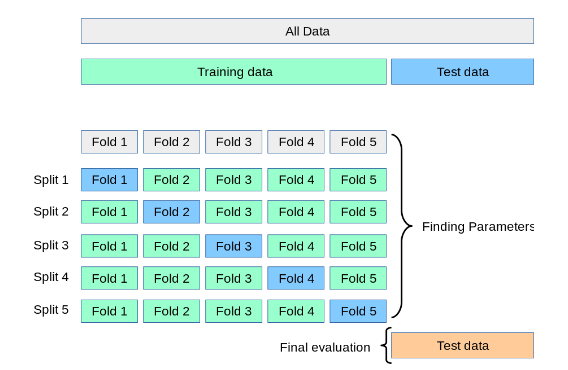

In [27]:
display.Image("Image/CrossValidation.png")

Let's try with a very limited dataset

In [28]:
# Do not modify
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

X, y = make_classification(
    n_samples=100,
    n_features=8,
    n_informative=6,
    n_classes=2,
    random_state=42
)

In [29]:
# Do not modify
# Define classifier
clf = LogisticRegression(penalty='none')

In [30]:
# Do not modify
# Split data in Train and Test
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stratified KFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)

for cv_ind, (train, val) in enumerate(cv.split(X_, y_)):
    clf.fit(X_[train], y_[train])
    y_pred_val = clf.predict(X_[val])
    print("Validation Accuracy score: ", accuracy_score(y_[val], y_pred_val))


y_pred_test = clf.predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Validation Accuracy score:  0.42857142857142855
Validation Accuracy score:  0.8571428571428571
Validation Accuracy score:  0.5
Validation Accuracy score:  0.8571428571428571
Validation Accuracy score:  0.5714285714285714
Test Accuracy score:  0.6666666666666666


/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, s

Depending on the choice of the test set, the accuracy could have varied greatly (from 0.42 to 0.85). The cross validation avoids this bias.

Is the obtained accuracy the best? We can make sure by doing a grid search in the space of the parameters.

In [31]:
# Do not modify
# Split data in Train and Test
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stratified KFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)

# Parameter for GridSearch
parameters = {'penalty':('l2', None)}

search = GridSearchCV(clf,
                   parameters,
                   cv=cv,
                   refit=False
                   )

# This does the same as refit=True
search.fit(X_, y_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(penalty='none'),
             param_grid={'penalty': ('l2', None)}, refit=False)

In [32]:
# Do not modify
clf_final = clf.set_params(**search.best_params_)
y_pred_test = clf.predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Test Accuracy score:  0.6666666666666666


## Iris dataset

Let's now apply these techniques to some classical datasets. The Iris dataset collects four features of the observations of three species of iris flower. The aim is to correctly classify the data points into the three species.

In [33]:
# Do not modify
# necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
# Do not modify
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

Please check out the Pipeline class on sklearn

In [35]:
# Do not modify
myLogReg = Pipeline(steps=[
    ("StandardScaler", StandardScaler()),
    ("LogReg", LogisticRegression())
])

### Binary classification

Extract classes 0 and 1 from the dataset

In [36]:
Xbin = X[y<2]
ybin = y[y<2]

Split train and test datasets

In [37]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xbin, ybin, test_size=0.3)

Fit the data

In [38]:
# Fit
myLogReg.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogReg', LogisticRegression())])

Show the confusion matrix and the F1 score

F1 score :  1.0


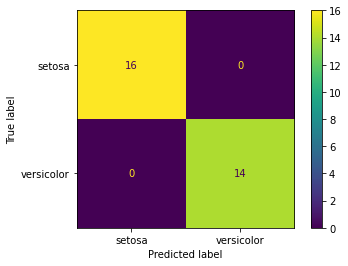

In [39]:
# evaluation
y_pred_test = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=iris.target_names[0:2])

print("F1 score : ", f1_score(y_test,y_pred_test))

### Multinomial classification

Repeat, this time using all three classes

In [40]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
#learning
myLogReg.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogReg', LogisticRegression())])

F1 score :  [1.         0.9375     0.93333333]


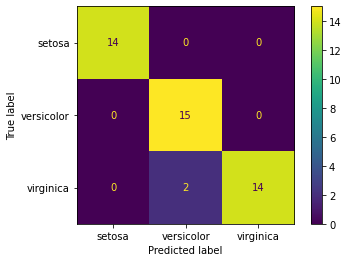

In [42]:
# evaluation
y_pred_test = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=iris.target_names)

print("F1 score : ", f1_score(y_test, y_pred_test, average=None))

## MNIST dataset

The MNIST dataset is a set of 28x28 pixel images of handwritten figures from 0 to 9. The images must thus be correctly classified in one of the 10 classes.

In [43]:
# Do not modify
# reading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2023-10-25 15:13:09.855336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 15:13:10.318242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-25 15:13:10.318295: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-25 15:13:11.744444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

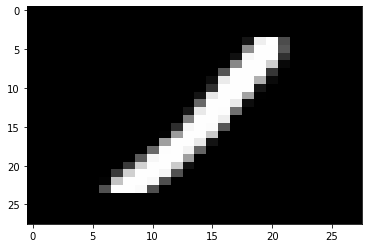

The true class is :  1


In [44]:
# Do not modify
#display randomly one of the pictures

i = randint(0,len(y_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print("The true class is : ", y_train[i])

In [45]:
# Do not modify
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [46]:
# Creation of Pipeline
myLogReg = Pipeline(steps=[
    ("StandardScaler", StandardScaler()),
    ("LogReg", LogisticRegression())
])

In [47]:
# Case of binary classification: let's choose 2 classes among the 10 classes: the 4's and the 8's

x_trainLin = x_trainLin[(y_train==4) | (y_train==8)]
x_testLin = x_testLin[(y_test==4) | (y_test==8)]
y_train = y_train[(y_train==4) | (y_train==8)]
y_test = y_test[(y_test==4) | (y_test==8)]

In [48]:
# Learn of logistic regressions

myLogReg.fit(x_trainLin,y_train)

/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogReg', LogisticRegression())])

F1 score :  0.9928934010152284


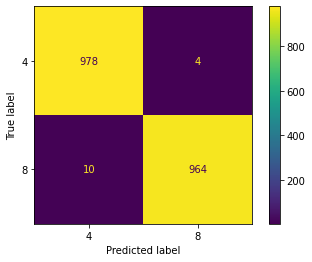

In [49]:
# Compute and display the f1 score and the confusion matrix
y_pred_test = myLogReg.predict(x_testLin)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

print("F1 score : ", f1_score(y_test,y_pred_test, pos_label=4))

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation YES
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ? Did some converge faster ?

### OneVsOne classification of the 10 classes

Now try and use the OneVsOneClassifier for classifying all 10 classes via the consensus of $10(10-1)/2 = 45$ binary classifiers

In [50]:
# Do not modify
from sklearn.multiclass import OneVsOneClassifier

# reading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [51]:
# Define your pipeline
myLogReg = Pipeline(steps=[
    ("StandardScaler", StandardScaler()),
    ("OVO", OneVsOneClassifier(LogisticRegression()))
])

In [52]:
# Fit the data

myLogReg.fit(x_trainLin,y_train)

/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('OVO', OneVsOneClassifier(estimator=LogisticRegression()))])

F1 score :  [0.96938776 0.979395   0.92442711 0.92601666 0.94992413 0.90337079
 0.9514867  0.94261893 0.90174002 0.921     ]


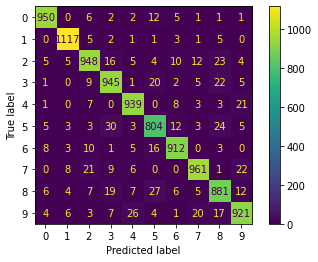

In [53]:
# Confusion matrix and F1 score

y_pred_test = myLogReg.predict(x_testLin)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

print("F1 score : ", f1_score(y_test,y_pred_test, labels=[i for i in range(10)], average=None))

Lastly, do the same with the multinomial regression you used for Iris. Does it do better or worse?

/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score :  [0.96214033 0.96734872 0.90666667 0.90953786 0.93503836 0.88332385
 0.94797086 0.9257087  0.88355465 0.9145679 ]


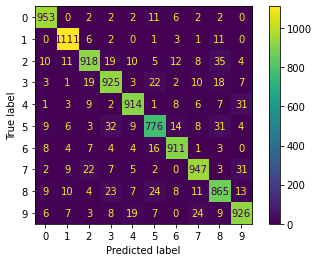

In [54]:
myLogReg = Pipeline(steps=[
    ("StandardScaler", StandardScaler()),
    ("Multinomial", LogisticRegression())
])

myLogReg.fit(x_trainLin,y_train)

y_pred_test = myLogReg.predict(x_testLin)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

print("F1 score : ", f1_score(y_test,y_pred_test, labels=[i for i in range(10)], average=None))